In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
#read the data, change the type of the time to a date type and create one structure to our dataset
novembro=pd.read_csv('2019-Nov.csv',nrows=20000)
novembro.event_time=pd.to_datetime(novembro.event_time)
november=novembro
outubro=pd.read_csv('2019-Oct.csv',nrows=20000)
outubro.event_time=pd.to_datetime(outubro.event_time)
october=outubro
dataset=pd.concat([outubro,novembro])

In [26]:
dataset

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
5,2019-10-01 00:00:16,cart,5857269,1487580005134238553,NaN,runail,2.62,430174032,73dea1e7-664e-43f4-8b30-d32b9d5af04f
6,2019-10-01 00:00:19,cart,5739055,1487580008246412266,NaN,kapous,4.75,377667011,81326ac6-daa4-4f0a-b488-fd0956a78733
7,2019-10-01 00:00:24,cart,5825598,1487580009445982239,NaN,NaN,0.56,467916806,2f5b5546-b8cb-9ee7-7ecd-84276f8ef486
8,2019-10-01 00:00:25,cart,5698989,1487580006317032337,NaN,NaN,1.27,385985999,d30965e8-1101-44ab-b45d-cc1bb9fae694
9,2019-10-01 00:00:26,view,5875317,2029082628195353599,NaN,NaN,1.59,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe


In [27]:
# question 1 - analyse what is the EVENT TYPE by each user and count it.
#defined the funnil of VIEWS,CART and PURCHASE
num_views=dataset[dataset.event_type=='view'].groupby('user_id').count()
num_views
num_carts=dataset[dataset.event_type=='cart'].groupby('user_id').count()
num_purchase=dataset[dataset.event_type=='purchase'].groupby('user_id').count()
num_remove=dataset[dataset.event_type=='remove_from_cart'].groupby('user_id').count()
#Now to find the complete funnil, we should find the intersection of those three, regard the user_id
completo=num_views.index.intersection(num_carts.index.intersection(num_purchase.index))
#after having the intersection, lets look about percentage of the whole users, how many complete this track
percentual=(len(completo)/dataset.user_id.nunique())*100
print("The rate of complete funnels:", percentual, "%")

The rate of complete funnels: 3.9735099337748347 %


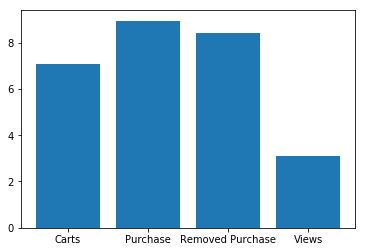

In [28]:
#1.1
#What’s the operation users repeat more on average within a session?
#Looking for each session, analyse which is the most repeated operation
most_repeated_operation=dataset.groupby('user_session').max()
most_repeated_operation['event_type']
#Produce a plot that shows the average number of times users perform each operation (view/removefromchart etc etc).
#see all the possible operations that a user could do
means=[num_views['event_type'].mean(),
num_carts['event_type'].mean(),
num_purchase['event_type'].mean(),
num_remove['event_type'].mean()]
x_axes=['Views','Carts','Purchase','Removed Purchase']
ax=plt.bar(x_axes,means) 

In [29]:
#How many times, on average, a user views a product before adding it to the cart?
#Get who are the users who view a product and add it on the cart by looking for the intersection
names=num_views.index.intersection(num_carts.index)
#Search in num_views and num_carts these people and make an average of each user - them for a matter of comparisson, make an overall average of these users
#search in the views array the people founded in names and get the values of views
aux=num_views.index.isin(names)
x1=num_views[aux].event_type
#search in the carts array the people founded in names and get the values of carts
aux2=num_carts.index.isin(names)
x2=num_carts[aux2].event_type
#See the average of Views/Carts of each person, the values smaller than one can be justified by people who select more than one
#of the same product
vec=x1/x2
#show the results and the overall average Views/Carts
print("For each user who add something to the cart, the number of Views/Carts",vec)
print("Overall average rate of Views/Add to the cart: ",sum(vec)/len(vec))

For each user who add something to the cart, the number of Views/Carts user_id
9794320       0.285714
75972882      1.857143
76459932      2.750000
104368191     3.666667
132447050     3.000000
151045021     4.333333
180716351     2.200000
184131842     1.000000
194804840     1.000000
196042408     0.333333
199252367     0.500000
203366328     0.666667
218483884     0.058824
223048543     0.400000
224519667     4.000000
227060608     0.136364
227618799     2.000000
231105826     1.769231
231766043     2.750000
231774003     0.416667
232539128     0.137931
233154210     0.666667
233397259     5.000000
235297216     1.000000
235505986     2.750000
235979928     0.500000
236972459     1.000000
239560194     0.400000
241286225     1.500000
241395032     0.166667
               ...    
566346216     0.500000
566346244     0.461538
566346471     0.500000
566346596     0.250000
566346759     0.828571
566348401     3.000000
566348585     2.000000
566348906     0.250000
566349007    11.000000
5

In [30]:
#What’s the probability that products added once to the cart are effectively bought?
#P(bought|added to the cart)=P(added to the cart *intersection* bought)/P(added to the cart)
#First, lets find the prob of product added to the cart - total of observations-sample space - number of added to the cart
P_add_cart=len(num_carts)/len(dataset)
#Now to find the intersection
P_cart_purchase=len(num_carts.index.intersection(num_purchase.index))/len(dataset)
P_bought_cart=P_cart_purchase/P_add_cart
print("P(bought|added to the cart)= ",P_bought_cart*100, "%")

P(bought|added to the cart)=  18.04939835338822 %


In [31]:
#What’s the average time an item stays in the cart before being removed?
#First, find the users who add something to the cart and also removed something from the cart
vamos=num_carts.index.intersection(num_remove.index)

#Using this list of names, search in the dataset the event_type cart for these users, and get the time
filtro1=dataset[dataset.user_id.isin(vamos)]
#Using filter get only the events of carts and remove from the ones selected above
aux_cart=filtro1[filtro1.event_type=='cart']
aux_remove=filtro1[filtro1.event_type=='remove_from_cart']

In [32]:
dataset[(dataset.event_type==('remove_from_cart' or 'cart'))].groupby(['user_id','product_id','user_session']).count()
#How much time passes on average between the first view time and a purchase/addition to cart?

event_time  \
user_id   product_id user_session                                       
9794320   5824819    1be8fa80-8036-4d95-93da-494a08d82cb5           1   
          5830883    1be8fa80-8036-4d95-93da-494a08d82cb5           1   
          5844670    1be8fa80-8036-4d95-93da-494a08d82cb5           2   
75972882  5696177    6d2fe1b2-ebb1-ed27-27bf-789ca140c2e4           1   
          5773346    6d2fe1b2-ebb1-ed27-27bf-789ca140c2e4           1   
          5773348    6d2fe1b2-ebb1-ed27-27bf-789ca140c2e4           1   
          5773349    6d2fe1b2-ebb1-ed27-27bf-789ca140c2e4           1   
          5847289    6d2fe1b2-ebb1-ed27-27bf-789ca140c2e4           1   
          5847293    6d2fe1b2-ebb1-ed27-27bf-789ca140c2e4           1   
          5847311    6d2fe1b2-ebb1-ed27-27bf-789ca140c2e4           1   
          5847319    1d934392-01b9-4cae-ba76-e2102fb69a05           1   
          5847336    6d2fe1b2-ebb1-ed27-27bf-789ca140c2e4           1   
          5847350    6d2fe1b2-ebb1-ed27-27bf-789ca140c2e4           1   
          5847353    6d2fe1b2-ebb1-ed27-27bf-789ca140c2e4           1   
76459932  5687146    3ce0a2c2-24e8-4092-8cd3-859afe114218           1   
          5754853    3ce0a2c2-24e8-4092-8cd3-859afe114218           2   
          5774874    3ce0a2c2-24e8-4092-8cd3-859afe114218           1   
          5774875    3ce0a2c2-24e8-4092-8cd3-859afe114218           1   
          5796982    3ce0a2c2-24e8-4092-8cd3-859afe114218           1   
          5796983    3ce0a2c2-24e8-4092-8cd3-859afe114218           1   
          5796984    3ce0a2c2-24e8-4092-8cd3-859afe114218           1   
          5829279    3ce0a2c2-24e8-4092-8cd3-859afe114218           1   
          5829280    3ce0a2c2-24e8-4092-8cd3-859afe114218           1   
          5830553    3ce0a2c2-24e8-4092-8cd3-859afe114218           1   
          5839697    3ce0a2c2-24e8-4092-8cd3-859afe114218           1   
          5839700    3ce0a2c2-24e8-4092-8cd3-859afe114218           1   
          5853686    3ce0a2c2-24e8-4092-8cd3-859afe114218           1   
          5870959    3ce0a2c2-24e8-4092-8cd3-859afe114218           1   
          5886064    3ce0a2c2-24e8-4092-8cd3-859afe114218           1   
          5889669    3ce0a2c2-24e8-4092-8cd3-859afe114218           1   
...                                                               ...   
566346596 5796729    c1c4b06c-5328-4854-89ff-bcd7f4058a5a           1   
566346759 5698889    9d849d76-4df0-47ef-a244-8e36d5eaf605           1   
          5698980    9d849d76-4df0-47ef-a244-8e36d5eaf605           1   
          5698985    9d849d76-4df0-47ef-a244-8e36d5eaf605           1   
          5698998    9d849d76-4df0-47ef-a244-8e36d5eaf605           1   
          5699001    9d849d76-4df0-47ef-a244-8e36d5eaf605           1   
          5774893    9d849d76-4df0-47ef-a244-8e36d5eaf605           1   
          5813066    9d849d76-4df0-47ef-a244-8e36d5eaf605           1   
          5875366    9d849d76-4df0-47ef-a244-8e36d5eaf605           1   
          5875370    9d849d76-4df0-47ef-a244-8e36d5eaf605           1   
          5875391    9d849d76-4df0-47ef-a244-8e36d5eaf605           1   
          5875394    9d849d76-4df0-47ef-a244-8e36d5eaf605           1   
566348294 5565106    5a41e87d-bc49-4ed9-bb60-6cb6f3cc6f1f           1   
          5649219    5a41e87d-bc49-4ed9-bb60-6cb6f3cc6f1f           1   
          5727537    5a41e87d-bc49-4ed9-bb60-6cb6f3cc6f1f           1   
          5747146    5a41e87d-bc49-4ed9-bb60-6cb6f3cc6f1f           1   
          5767919    5a41e87d-bc49-4ed9-bb60-6cb6f3cc6f1f           1   
          5852597    5a41e87d-bc49-4ed9-bb60-6cb6f3cc6f1f           1   
566350732 59977      df177f2d-2596-48b3-8a74-cd8a9f8518d8           1   
566350878 5880203    36d4d27f-744a-441c-adb5-00497946e007           1   
          5880205    36d4d27f-744a-441c-adb5-00497946e007           1   
566354533 5548100    83dad419-b8e9-4cde-904f-86afc5475839           1   
          5598857    83dad419-b8e9-4cde-904f

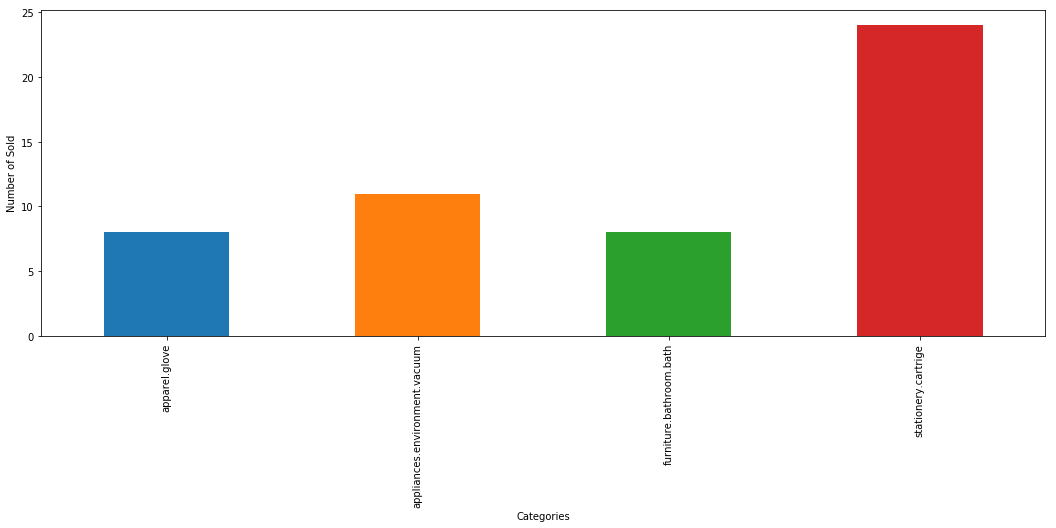

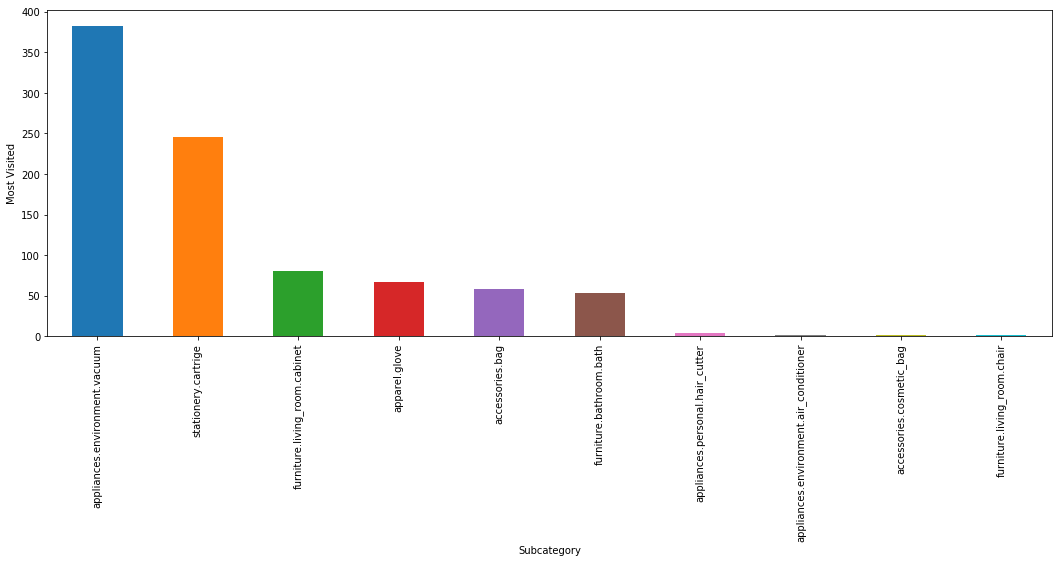

category_code                  product_id
stationery.cartrige            5766980       5
appliances.environment.vacuum  8098          4
stationery.cartrige            5788783       3
                               5743974       3
apparel.glove                  6737          3
stationery.cartrige            5767494       2
apparel.glove                  6817          2
appliances.environment.vacuum  5825604       2
stationery.cartrige            5749199       2
                               5775814       2
Name: event_type, dtype: int64

In [33]:
#[RQ2] What are the categories of the most trending products overall? 
#For each month visualize this information through a plot showing the number of sold products per category.
#Plot the most visited subcategories.
#What are the 10 most sold products per category?
#For each month visualize this information through a plot showing the number of sold products per category.
#Month wise sold product 
oct_purchase = october[october.event_type=='purchase']
nov_puchase = november[november.event_type=='purchase']
#Plotting showing the number of sold products per category 
plt.figure(figsize=(18,6))
oct_sold_category = oct_purchase.groupby('category_code').event_type.count().plot.bar()
nov_sold_category = nov_puchase.groupby('category_code').event_type.count().plot.bar()
plt.xlabel('Categories')
plt.ylabel('Number of Sold')
plt.show()
#%%
#Plot the most visited subcategories.
plt.figure(figsize=(18,6))
most_visited_cat = dataset.groupby(['category_code']).event_type.count().sort_values(ascending=False).nlargest(10).plot.bar()
plt.xlabel('Subcategory')
plt.ylabel('Most Visited')
plt.show()
#What are the 10 most sold products per category?
purchased = dataset[dataset.event_type=='purchase']
purchased.groupby(['category_code','product_id']).event_type.count().sort_values(ascending=False).nlargest(10)
#%%

2053013552326770905


array(['appliances.environment.water_heater',
       'furniture.living_room.sofa', 'computers.notebook',
       'electronics.smartphone', 'computers.desktop',
       'apparel.shoes.keds', 'appliances.kitchen.microwave',
       'furniture.bedroom.bed', 'electronics.video.tv',
       'appliances.kitchen.mixer', 'electronics.audio.headphone',
       'appliances.environment.air_heater', 'apparel.shoes',
       'appliances.environment.vacuum',
       'appliances.kitchen.refrigerators', 'appliances.kitchen.washer',
       'computers.peripherals.monitor', 'construction.tools.pump',
       'electronics.clocks', 'apparel.shoes.slipons',
       'furniture.living_room.chair', 'auto.accessories.compressor',
       'appliances.kitchen.meat_grinder',
       'computers.components.videocards', 'furniture.kitchen.table',
       'construction.tools.drill', 'kids.toys', 'electronics.telephone',
       'furniture.bathroom.toilet', 'auto.accessories.alarm',
       'apparel.sock', 'auto.accessories.player',

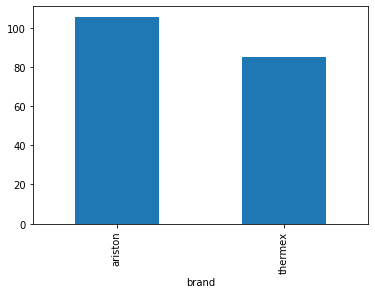

In [14]:
#RQ3] For each category, what’s the brand whose prices are higher on average?
#Write a function that asks the user a category in input and returns a plot indicating the average price of the products sold by the brand.#
#Find, for each category, the brand with the highest average price. Return all the results in ascending order by price.
#%%
#For each category, what’s the brand whose prices are higher on average?
data = dataset.groupby(['category_code','brand'])
data.mean()['price'].nlargest()
#%%
#Write a function that asks the user a category in input and 
#returns a plot indicating the average price of the products sold by the brand.#
entered_input = int(input().strip())

def category(category_value):
    sold_data = dataset[dataset.event_type=='purchase']
    data_of_selected_customer_id = sold_data.loc[sold_data['category_id']==entered_input]
    result = data_of_selected_customer_id.groupby(data_of_selected_customer_id.brand).price.mean().plot.bar()
    return result

category(entered_input)
#input : 2053013552326770905
#%%
#Find,for each category, the brand with the highest average price. 
# Return all the results in ascending order by price.
dataset.dropna(subset= ['category_code'],inplace=True)
df = dataset.groupby([dataset.category_code,dataset.brand]).mean()['price'].sort_values()
df.nlargest()
#%%
dataset['category_code'].unique()

In [38]:
#4 - How much does each brand earn per month?
#First, selecting the purchase we make sure that we only count what is really bought and them group by the brands
dataset[dataset.event_type=='purchase'].groupby('brand').price.sum()

brand
depilflax     18.12
emil           1.75
italwax       47.85
jessnail      21.43
max          152.06
nitrile       28.56
nitrimax      20.64
polarus       56.35
runail        33.17
Name: price, dtype: float64

In [39]:
#Write a function that given the name of a brand in input returns, for each month, its profit.
#First define a smaller dataset, looking only to the purchase
purchase_october=october[october.event_type=='purchase']
purchase_november=november[november.event_type=='purchase']
#the fuction receives an input and them search the brand
#group the given brand name profit in different months
def brand_select (br=input()):
    profit_october = purchase_october[purchase_october.brand==br].price.sum()
    profit_november = purchase_november[purchase_november.brand==br].price.sum()
    print("Monthly profit of the brand:",br)
    print("October: ", profit_october)
    print("November: ",profit_november)
    return 0

print("Please, enter the name of the brand!")
profit=brand_select()

polarus
Please, enter the name of the brand!
Monthly profit of the brand: polarus
October:  1.27
November:  55.080000000000005


In [40]:
#Using the function you just created, find the top 3 brands that have suffered the biggest losses
#in earnings between one month and the next,specifing bothe the loss percentage and the 2 months
#Separate the analysis of the dataframe in two different, october and november, because doing this we can have the difference easily.
purchase_outubro = outubro[outubro.event_type=='purchase']
purchase_novembro = novembro[novembro.event_type=='purchase']
#After the separation we calcule the loss percentage by each brand
loss=100*((purchase_outubro.groupby('brand').price.sum())-(purchase_novembro.groupby('brand').price.sum()))/(purchase_outubro.groupby('brand').price.sum())
print("The top 3 brands that have suffered the biggest losses:")
#Here we sort the values and show the three biggest losses
loss.sort_values(ascending=False).head(3)

The top 3 brands that have suffered the biggest losses:


brand
skinlite     91.546527
levissime    90.000000
smart        82.913337
Name: price, dtype: float64

In [41]:
#Is the average price of products of different brands significantly different?
#Here we can see all the mean prices of the brands, they are a bit different
tyl=dataset[dataset.event_type=='purchase'].groupby('brand').price.mean()
#First lets look to an overall discrepance of values by see the max and the min
dif=tyl.max()-tyl.min()
print("The difference of the maximum mean and the minimum mean of all the average prices of each brand:",dif)
#Looking for a better comparative result, we can first do an overall mean and see how each brand is far from the mean - variance
oa_mean=tyl.mean()
print("Variance of each brand mean price:", np.sqrt((tyl-oa_mean)**2))
print("By looking to the results we can assume that the average price of products of differet brands are significantly different")

The difference of the maximum mean and the minimum mean of all the average prices of each brand: 48.93666666666667
Variance of each brand mean price: brand
depilflax    11.888382
emil         13.158382
italwax      12.827947
jessnail      6.521618
max          35.778285
nitrile       5.388382
nitrimax      4.588382
polarus       3.874952
runail        1.676618
Name: price, dtype: float64
By looking to the results we can assume that the average price of products of differet brands are significantly different


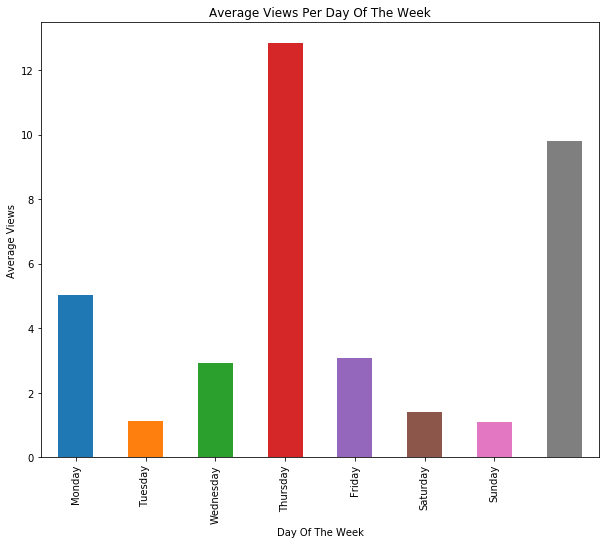

In [42]:
#[RQ5] In what part of the day is your store most visited? 
#Knowing which days of the week or even which hours of the day shoppers are likely to visit your online
#store and make a purchase may help you improve your strategies. 
#Create a plot that for each day of the week show the hourly average of visitors your store has
#dataset.head(3)
#In what part of the day is your store most visited? 
#df_hour = dataset.groupby(['user_session',dataset.event_time.dt.hour]).user_session.count().sort_values(ascending=False)
dataset.groupby([dataset.event_time.dt.hour , dataset.event_type]).event_type.count().nlargest(1)
#%%
#Create a plot that for each day of the week show the hourly average of visitors your store has.
total_visitors = dataset.groupby([dataset.event_time.dt.dayofweek,dataset.event_type]).event_type.count()
daily_visitors_average=total_visitors/24
#daily_visitors_average
Days_in_number=[0,1,2,3,4,5,6]
dayname_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
plt.figure(figsize=(10,8))
daily_visitors_average.plot.bar()
plt.title("Average Views Per Day Of The Week")
plt.xlabel("Day Of The Week")
plt.ylabel("Average Views")
plt.xticks(Days_in_number,dayname_of_week)
plt.show()

In [43]:
#6 - The conversion rate of a product is given by the number of times a product has been bought over the number of
#times it has been visited.

#Start the analysis splitling the bought and the views
comprado=dataset[dataset.event_type=='purchase']
visto=dataset[dataset.event_type=='view']
#Count how many of each product was bought - look for the count of event_type
num_comp=comprado.groupby('product_id').count()
#Count how many of each product was viewed - look for the count of event_type
num_vist=visto.groupby('product_id').count()
#What's the conversion rate of your online store?
#Find the overall conversion rate of your store.
conversion_rate=num_comp.event_type.count()/num_vist.event_type.count()
print("The overall conversion rate of the online store: ",100*conversion_rate,"%")

The overall conversion rate of the online store:  31.060606060606062 %


Conversion rate of each category in decreasing order:  category_code
furniture.bathroom.bath          0.045455
appliances.environment.vacuum    0.055762
apparel.glove                    0.363636
stationery.cartrige              0.571429
Name: event_type, dtype: float64


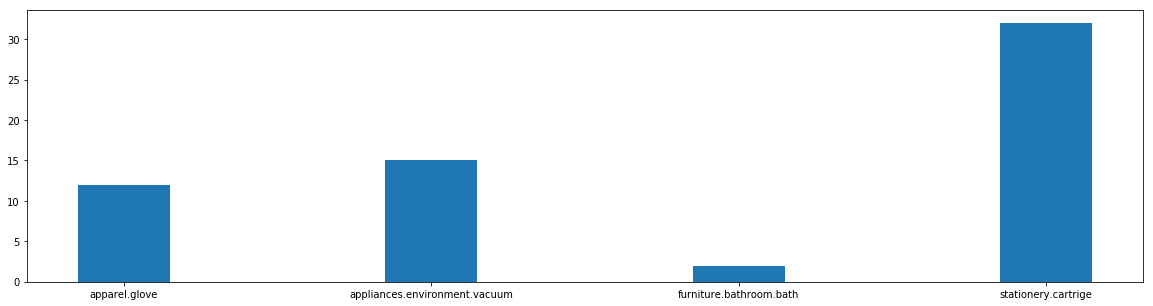

In [44]:
#Plot the number of purchases of each category and show the conversion rate of each category in decreasing order.
#Get the number of purchases and views of each category
blaw=comprado.groupby('category_code').event_type.count()
blaw2=visto.groupby('category_code').event_type.count()
#plot the result
plt.figure(figsize=(20,5))
plt.bar(blaw.index,blaw.values,width=0.3,align='center')
out=(blaw/blaw2).dropna()
print("Conversion rate of each category in decreasing order: ",out.sort_values())

In [45]:
#7 - The Pareto principle states that for many outcomes roughly 80% of consequences come from 20% of the causes.
#Also known as 80/20 rule, in e-commerce simply means that most of your business,
#around 80%, likely comes from about 20% of your customers.
#Prove that the pareto principle applies to your store.

#First we get the number of buyers
compradores=comprado.user_id.nunique()
#Then get the total spent
total=comprado.price.sum()
#See how much each user spend
lista_compradores=comprado.groupby('user_id').price.sum()
clint_20=lista_compradores.nlargest(int(compradores*0.2))
#Get the 20% of the biggest clients by the value spent and sum how much they spent.
print("20% of the best clients spent: ",clint_20.sum(), "at the online shop")
print("80% of the total income of the online shop: ", total*0.8)
print("Result of the Pareto principle in the following dataset:", (clint_20.sum())/(total*0.8)*100,"%")

20% of the best clients spent:  305.2 at the online shop
80% of the total income of the online shop:  395.72799999999995
Result of the Pareto principle in the following dataset: 77.12368091214168 %
